In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [2]:
import matplotlib.pyplot as plt
import torch

# MoG plotting function

In [3]:
def plot_energy(target_energy, x, energies, w_x, w_energies, ylabel=False, nstd=2.0, figsize=(4, 4)):
    fig = plt.figure(figsize=figsize)
    
    X = torch.Tensor(np.vstack([np.linspace(-3, 3, num=100), np.zeros((1, 100))]).T)
    E_target = target_energy.energy(X)
    E_target -= E_target.min()
    plt.plot(X[:, 0], E_target, linewidth=3, color='#444444')

    # unweighted
    E_mean = np.mean(energies, axis=0)
    E_mean -= E_mean.min()
    plt.errorbar(x, E_mean, nstd*np.std(energies, axis=0), color='red', linewidth=2)
    
    # weighted
    Ew_mean = np.mean(w_energies, axis=0)
    Ew_mean -= Ew_mean.min()
    plt.errorbar(w_x, Ew_mean, nstd*np.std(w_energies, axis=0), color='green', linewidth=2)
    
    plt.ylim(-1, 14)
    plt.xlabel('$x_1$')
    if ylabel:
        plt.ylabel('Energy (kT)')
    else:
        plt.yticks([])
    return fig

# Let's go

In [4]:
from TargetDistributions.DoubleWell import ManyWellEnergy
dim = 2
target = ManyWellEnergy(dim=dim, a=-0.5, b=-6)

In [5]:
figsize=(4, 4)
fig = plt.figure(figsize=figsize)
X = torch.Tensor(np.vstack([np.linspace(-3, 3, num=100), np.zeros((1, 100))]).T)
E_target = target.energy(X)


<Figure size 288x288 with 0 Axes>

In [6]:
E_target.shape

torch.Size([100, 1])

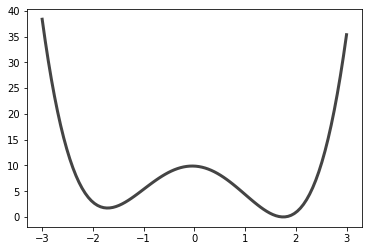

In [7]:
E_target -= E_target.min()
plt.plot(X[:, 0], E_target, linewidth=3, color='#444444')

# Let's train a BG

In [10]:
from AIS_train.Run_Experiment import run_experiment

In [8]:
from datetime import datetime
current_time = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
problem = "ManyWell"
dim = 2
epochs = 100
n_flow_steps = 60
n_distributions = 2 + 2
batch_size = int(1e3)
KPI_batch_size = int(1e3)
n_samples_expectation = int(batch_size*2)
experiment_name = "DoubleWell"
n_plots = 3
flow_type = "RealNVP"
HMC_transition_args = {"step_tuning_method": "p_accept"}
learnt_dist_kwargs = {"lr": 1e-3, "optimizer": "AdamW"}
save_path = f"Results/{experiment_name}__{problem}" \
            f"{dim}dim_{flow_type}_epochs{epochs}_flowsteps{n_flow_steps}_dist{n_distributions}" \
            f"__{current_time}" \
            f"HMC{HMC_transition_args['step_tuning_method']}"


running experiment Results/DoubleWell__ManyWell2dim_RealNVP_epochs100_flowsteps60_dist4__2021_07_31-11_18_26_AMHMCp_accept 


setting device as cpu


  0%|                                                                                                                                                          | 0/100 [00:00<?, ?it/s]

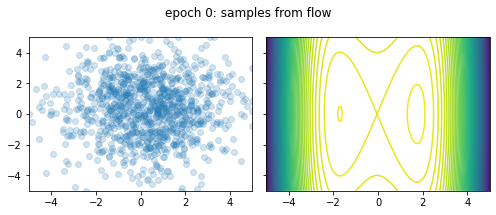

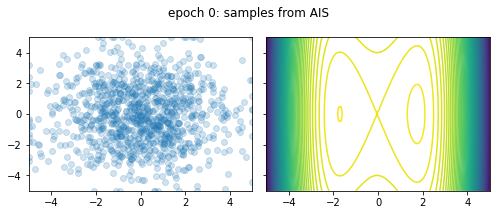

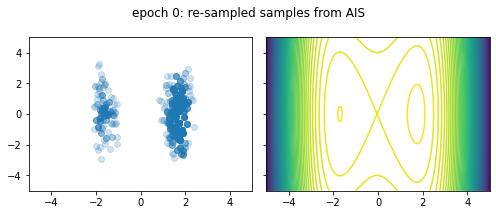

loss: 29.11,mean_log_q_x_test_samples -3.22,min_log_q_x_test_samples -4.08ESS 0.232204:  20%|███████████▍                                             | 20/100 [02:22<05:08,  3.86s/it]

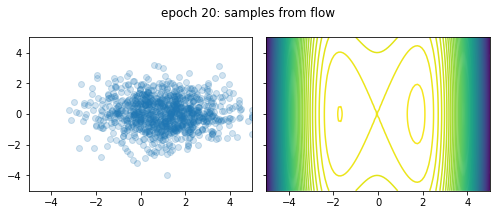

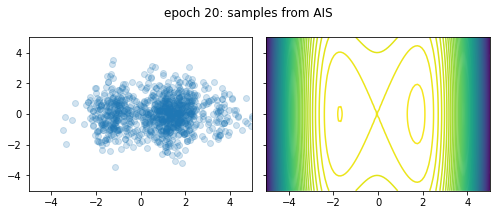

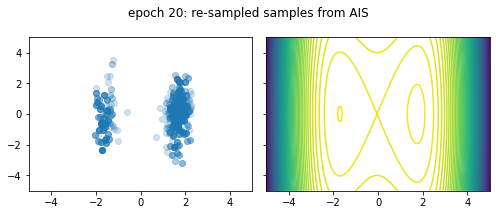

loss: 29.1,mean_log_q_x_test_samples -3.33,min_log_q_x_test_samples -4.42ESS 0.242621:  40%|███████████████████████▏                                  | 40/100 [04:19<03:42,  3.70s/it]

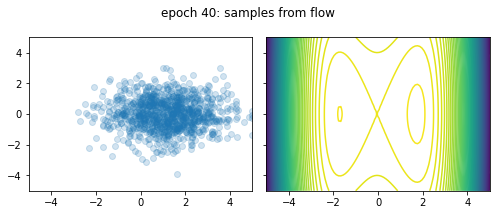

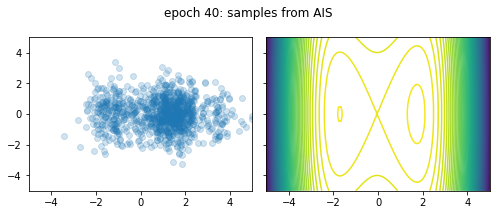

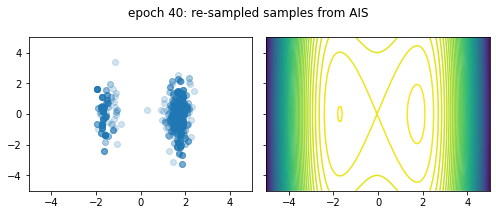

loss: 29.07,mean_log_q_x_test_samples -3.18,min_log_q_x_test_samples -4.09ESS 0.238302:  60%|██████████████████████████████████▏                      | 60/100 [05:43<01:18,  1.96s/it]

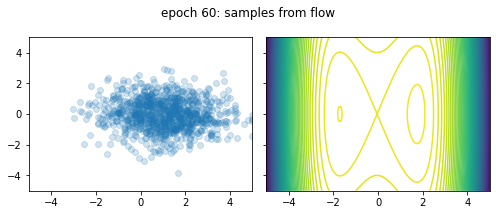

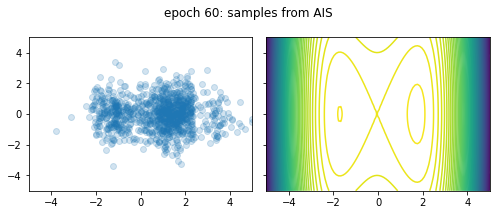

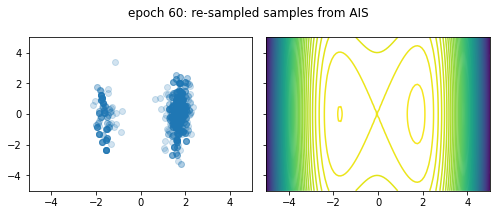

loss: 29.08,mean_log_q_x_test_samples -3.28,min_log_q_x_test_samples -4.29ESS 0.242212:  80%|█████████████████████████████████████████████▌           | 80/100 [06:49<00:38,  1.91s/it]

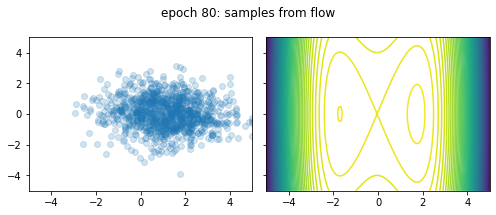

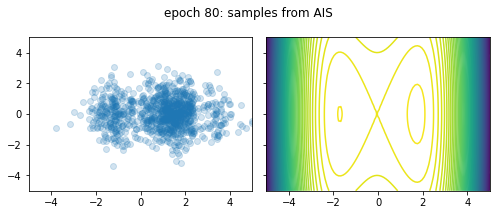

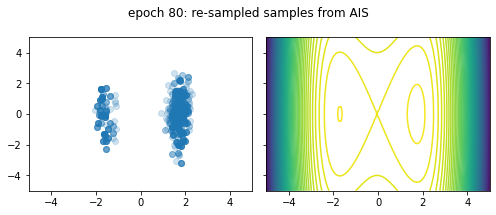

loss: 29.05,mean_log_q_x_test_samples -3.13,min_log_q_x_test_samples -3.97ESS 0.241808: 100%|████████████████████████████████████████████████████████| 100/100 [08:27<00:00,  5.07s/it]


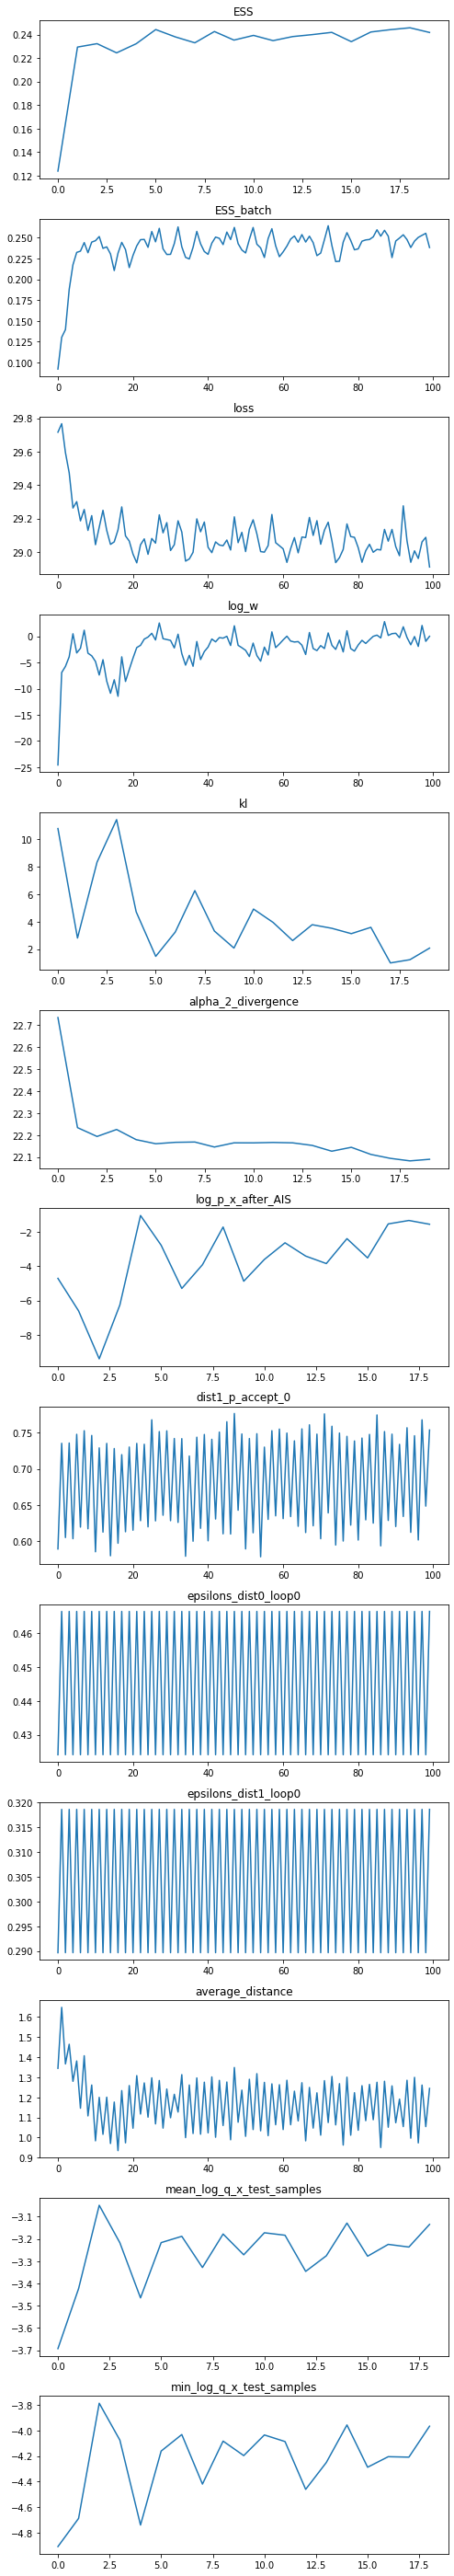

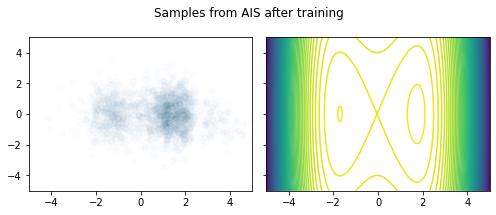

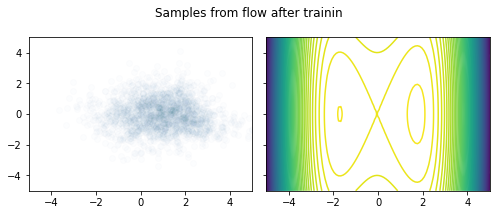

*********     Parameters      *******************

dim 2
save_path Results/DoubleWell__ManyWell2dim_RealNVP_epochs100_flowsteps60_dist4__2021_07_31-11_18_26_AMHMCp_accept
epochs 100
n_flow_steps 60
n_distributions 4
flow_type RealNVP
batch_size 1000
seed 0
n_samples_expectation 2000
save False
n_plots 5
HMC_transition_args {'step_tuning_method': 'p_accept'}
learnt_dist_kwargs {'lr': 0.001, 'optimizer': 'AdamW'}
problem ManyWell
non_default_flow_width None


 *******************************    Results ********************* 

ESS of AIS before training is 0.0927059377398818 calculated using 2000 samples 
ESS for samples from AIS  0.2670527290261256 calculated using 2000 samples 
ESS for samples from AIS of repeat calc 0.24496807196124645 calculated using 2000 samples 
ESS of flow model after training is 0.22820273612319888 calculated using 2000 samples


finished running experiment Results/DoubleWell__ManyWell2dim_RealNVP_epochs100_flowsteps60_dist4__2021_07_31-11_18_26_AMHMCp_accept


In [16]:
print(f"running experiment {save_path} \n\n")
assert n_samples_expectation % batch_size == 0
tester, history = run_experiment(dim, save_path, epochs, n_flow_steps, n_distributions,
               flow_type, learnt_dist_kwargs=learnt_dist_kwargs, n_plots=n_plots,
               batch_size=batch_size, n_samples_expectation=n_samples_expectation, problem=problem,
               HMC_transition_args=HMC_transition_args, save=False,
                                KPI_batch_size=KPI_batch_size)
print(f"\n\nfinished running experiment {save_path}")

In [17]:
from FittedModels.utils.model_utils import sample_and_log_w_big_batch_drop_nans

In [19]:
sample_and_log_w_big_batch_drop_nans(tester, n_samples=int(1e3), batch_size=int(1e2), AIS=False)[0].shape

torch.Size([1000, 2])

In [20]:
from tqdm import tqdm
def sample_energy(sample_and_log_w_func, n_samples=int(1e5), n_repeat=20, nbins=30):
    # frorm histogram - used to estimate free energy differences (by clumping within histo we are aggregating)
    hist_x = None
    whist_x = None
    hists_y = []
    whists_y = []
    for i in tqdm(range(n_repeat)):
        y, log_totalweights = sample_and_log_w_func(n_samples)
        samples = y[:, 0]
        hist_y, edges = np.histogram(samples.detach().numpy(), bins=nbins, density=True)
        hists_y.append(-np.log(hist_y))
        hist_x = 0.5 * (edges[1:] + edges[:-1])
        #
        whist_y, edges = np.histogram(samples.detach().numpy(), bins=nbins, density=True,
                                      weights=np.exp(log_totalweights.detach().numpy()))
        whists_y.append(-np.log(whist_y))
        whist_x = 0.5 * (edges[1:] + edges[:-1])

    # align energies
    for i in range(n_repeat):
        hists_y[i] -= np.mean(hists_y[i][np.isfinite(hists_y[i])])
        whists_y[i] -= np.mean(whists_y[i][np.isfinite(whists_y[i])])

    return hist_x, hists_y, whist_x, whists_y

In [21]:
from_flow = lambda n_samples: sample_and_log_w_big_batch_drop_nans(tester, n_samples=n_samples, batch_size=int(1e4), AIS=False)
from_AIS = lambda n_samples: sample_and_log_w_big_batch_drop_nans(tester, n_samples=n_samples, batch_size=int(1e4), AIS=True) 

## Let's look at flow plot

In [26]:
hist_x, hists_y, whist_x, whists_y = sample_energy(from_flow, n_repeat=20, n_samples=int(1e5))

<ipython-input-20-b1b70deaf6bf>:15: RuntimeWarning: divide by zero encountered in log
  whists_y.append(-np.log(whist_y))
<ipython-input-20-b1b70deaf6bf>:10: RuntimeWarning: divide by zero encountered in log
  hists_y.append(-np.log(hist_y))


C:\Users\meatrobot\miniconda3\envs\Pytorch\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\meatrobot\miniconda3\envs\Pytorch\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


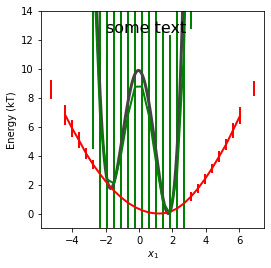

In [27]:
fig = plot_energy(target, hist_x, hists_y, whist_x, whists_y, ylabel=True, nstd=1.0)
plt.text(-2, 12.5, 'some text', fontsize=16);

# And AIS plot

In [30]:
hist_x, hists_y, whist_x, whists_y = sample_energy(from_AIS, n_repeat=20, n_samples=int(1e5))

<ipython-input-20-b1b70deaf6bf>:15: RuntimeWarning: divide by zero encountered in log
  whists_y.append(-np.log(whist_y))
<ipython-input-20-b1b70deaf6bf>:10: RuntimeWarning: divide by zero encountered in log
  hists_y.append(-np.log(hist_y))


C:\Users\meatrobot\miniconda3\envs\Pytorch\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\meatrobot\miniconda3\envs\Pytorch\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


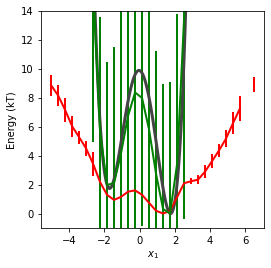

In [32]:
fig = plot_energy(target, hist_x, hists_y, whist_x, whists_y, ylabel=True, nstd=1.0)
#plt.text(-2, 12.5, 'some text', fontsize=16);

# Analyse Stats

In [35]:
def bias_uncertainty(target_energy, x, energies, w_x, w_energies):
    X = torch.Tensor(np.vstack([x, np.zeros((1, len(x)))]).T)
    E_target = target_energy.energy(X)[:, 0]
    E_target -= E_target.min()

    # unweighted
    E_mean = np.mean(energies, axis=0)
    E_mean -= E_mean.min()

    # weighted
    Ew_mean = np.mean(w_energies, axis=0)
    Ew_mean -= Ew_mean.min()

    I = np.logical_and(x > -2.25, x < 2.25)
    # bias
    bias_unweighted = E_target - E_mean
    bias_unweighted = bias_unweighted.detach().numpy()
    J = np.isfinite(bias_unweighted)
    bias_unweighted = np.abs(bias_unweighted[I*J].mean())
    bias_reweighted = E_target - Ew_mean
    bias_reweighted = bias_reweighted.detach().numpy()
    J = np.isfinite(bias_reweighted)
    bias_reweighted = np.abs(bias_reweighted[I*J].mean())
    # uncertainty
    std_unweighted = np.array(energies)[:, I*J].std(axis=0).mean()
    std_reweighted = np.array(w_energies)[:, I*J].std(axis=0).mean()

    return bias_unweighted, std_unweighted, bias_reweighted, std_reweighted

In [39]:
hist_x.shape, hists_y[0].shape

((30,), (30,))

In [40]:
bias, std, bias_w, std_w = bias_uncertainty(target, hist_x, hists_y, whist_x, whists_y)

In [42]:
bias, std, bias_w, std_w

(3.9105194066173015, 0.3657214997484314, 0.8626666671248363, 9.178236067833817)

In [44]:
target_energy, x, energies, w_x, w_energies = target, hist_x, hists_y, whist_x, whists_y
X = torch.Tensor(np.vstack([x, np.zeros((1, len(x)))]).T)
E_target = target_energy.energy(X)[:, 0]
E_target -= E_target.min()

# unweighted
E_mean = np.mean(energies, axis=0)
E_mean -= E_mean.min()

# weighted
Ew_mean = np.mean(w_energies, axis=0)
Ew_mean -= Ew_mean.min()

In [54]:
I = np.logical_and(x > -2.25, x < 2.25)
# bias
bias_unweighted = E_target - E_mean # for each of histogram zones

In [53]:
bias_unweighted = bias_unweighted.detach().numpy()
J = np.isfinite(bias_unweighted)
bias_unweighted = np.abs(bias_unweighted[I*J].mean()) # average across dimensions to give scalar ()

3.9105194066173015

In [ ]:
bias_reweighted = E_target - Ew_mean
bias_reweighted = bias_reweighted.detach().numpy()
J = np.isfinite(bias_reweighted)
bias_reweighted = np.abs(bias_reweighted[I*J].mean())
# uncertainty
std_unweighted = np.array(energies)[:, I*J].std(axis=0).mean()
std_reweighted = np.array(w_energies)[:, I*J].std(axis=0).mean()